# Inferential Statistics for Capstone 1
## Molly McNamara

The cleaned, wrangled dataset now consists of pollution data for cities across the United States from 2000 to early 2016 merged with weather data for a handful of the largest US cities from 2000-2015. Inferential statistics can now be used to explore the data further and identify potential relationships of interest for building a predictive model of pollutant levels.

#### Import necessary packages and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from IPython.display import display,HTML
pd.set_option("display.max.columns",500)
pd.set_option("display.max.rows",500)
%matplotlib inline
pollution = pd.read_csv('~/Desktop/weatherpollution.csv', index_col='Unnamed: 0')
pollution['Date_Local']= pd.to_datetime(pollution['Date_Local'],  errors='raise', format='%Y/%m/%d')
pollution.dtypes

/Users/mollymcnamara/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (28,29,30,31,35,36,39,40,41,42,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Site_Num                           int64
Date_Local                datetime64[ns]
State                             object
County                            object
City                              object
NO2_Mean                         float64
NO2_1stMaxValue                  float64
NO2_1stMaxHour                   float64
NO2_AQI                          float64
O3_Mean                          float64
O3_1stMaxValue                   float64
O3_1stMaxHour                    float64
O3_AQI                           float64
SO2_Mean                         float64
SO2_1stMaxValue                  float64
SO2_1stMaxHour                   float64
SO2_AQI                          float64
CO_Mean                          float64
CO_1stMaxValue                   float64
CO_1stMaxHour                    float64
CO_AQI                           float64
TempAvg                          float64
TempMax                          float64
TempMin                          float64
Elevation       

#### Subset this data to the top 7 US cities evaluated joined with weather data

In [2]:
# Of the 10 largest cities in the US, only 7 of them have 14-15 years of data.  To be consistent for future analysis, we will use only these.
the7cities = ['New York', 'Los Angeles', 'Houston', 'Phoenix', 'Philadelphia', 'San Diego', 'Dallas']
pollution7 = pollution[pollution['City'].isin(the7cities)]

In [3]:
pollution7.shape

(56073, 49)

#### Normality of the pollution data
Visually and statistically, each of the Air Quality Indices was evaluated for normality.

#### Nitrogen Dioxide

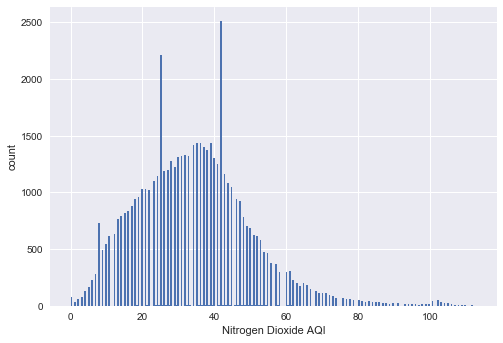

In [4]:
#Is the distribution of each pollutant normal?
sns.set()
n_data = len(pollution7.NO2_AQI)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
plt.hist(pollution7.NO2_AQI, bins = n_bins)
plt.xlabel('Nitrogen Dioxide AQI')
plt.ylabel('count')
plt.show()

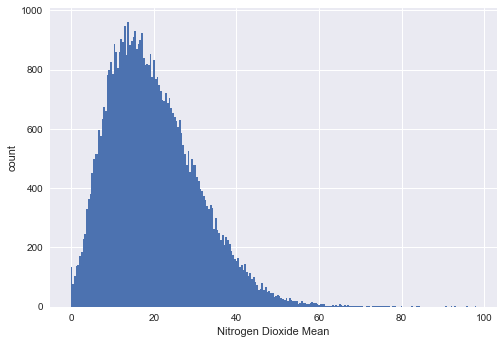

In [5]:
n_data = len(pollution7.NO2_Mean)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
plt.hist(pollution7.NO2_Mean, bins = n_bins)
plt.xlabel('Nitrogen Dioxide Mean')
plt.ylabel('count')
plt.show()

In [6]:
import scipy.stats as stats
stats.normaltest(pollution7.NO2_Mean)

NormaltestResult(statistic=5819.9338941331644, pvalue=0.0)

#### Ozone

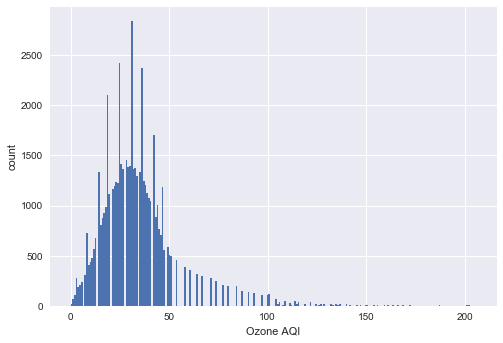

In [7]:
n_data = len(pollution7.O3_AQI)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
plt.hist(pollution7.O3_AQI, bins = n_bins)
plt.xlabel('Ozone AQI')
plt.ylabel('count')
plt.show()

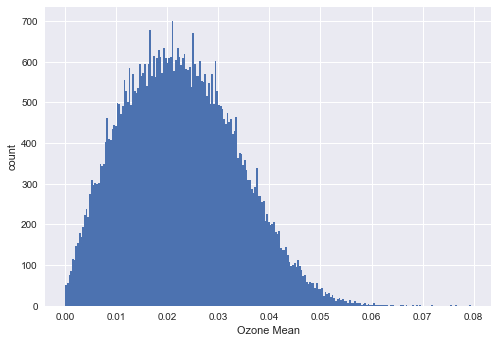

In [8]:
n_data = len(pollution7.O3_Mean)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
plt.hist(pollution7.O3_Mean, bins = n_bins)
plt.xlabel('Ozone Mean')
plt.ylabel('count')
plt.show()

In [9]:
stats.normaltest(pollution7.O3_Mean)

NormaltestResult(statistic=1314.3479812800674, pvalue=3.9170779552632949e-286)

#### Sulfur Dioxide

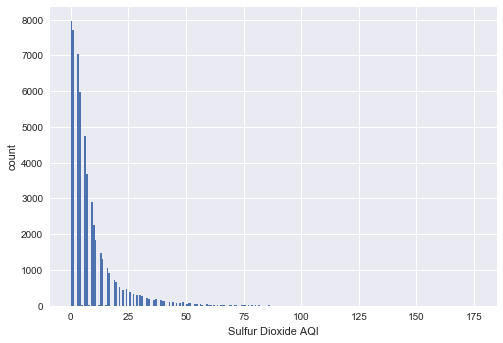

In [10]:
n_data = len(pollution7.SO2_AQI)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
plt.hist(pollution7.SO2_AQI, bins = n_bins)
plt.xlabel('Sulfur Dioxide AQI')
plt.ylabel('count')
plt.show()

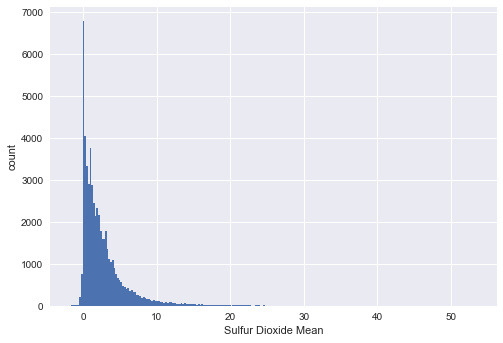

In [11]:
n_data = len(pollution7.SO2_Mean)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
plt.hist(pollution7.SO2_Mean, bins = n_bins)
plt.xlabel('Sulfur Dioxide Mean')
plt.ylabel('count')
plt.show()

In [12]:
stats.normaltest(pollution7.SO2_Mean)

NormaltestResult(statistic=40623.899981612878, pvalue=0.0)

#### Carbon Monoxide

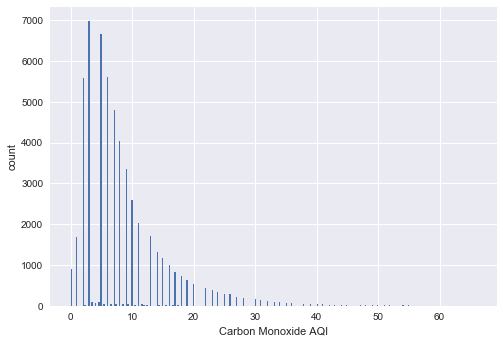

In [13]:
n_data = len(pollution7.CO_AQI)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
plt.hist(pollution7.CO_AQI, bins = n_bins)
plt.xlabel('Carbon Monoxide AQI')
plt.ylabel('count')
plt.show()

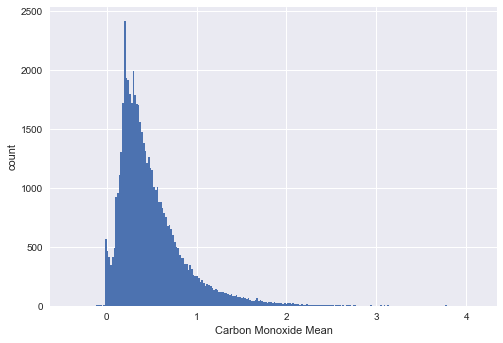

In [14]:
n_data = len(pollution7.CO_Mean)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
plt.hist(pollution7.CO_Mean, bins = n_bins)
plt.xlabel('Carbon Monoxide Mean')
plt.ylabel('count')
plt.show()

In [15]:
stats.normaltest(pollution7.CO_Mean)

NormaltestResult(statistic=25036.603494610208, pvalue=0.0)

The pollutant data does not appear to be normally distributed with the exception of mean daily ozone. This is good to know and could be a result of a number of things: a number of extreme values, as can occur in nature at times, or many values close to 0 or some sort of natural limit.

#### Correlations of Interest
The pollutant indices and the raw mean daily values for each pollutant were assessed relative to the new weather data to see any potential correlations.

In [16]:
colsofinterest = ['NO2_AQI', 'NO2_Mean', 'O3_AQI', 'O3_Mean', 'SO2_AQI', 'SO2_Mean','CO_AQI', 'CO_Mean', 'Elevation', 'Latitude', 'Longitude', 'TempAvg', 'TempMax', 'TempMin', 'MaxTempDryBulb', 'MinTempDryBulb', 'AvgTempDryBulb', 'DeptfromNormAvgTemp', 'AvgRelHumid', 'Sunrise', 'Sunset', 'Precip', 'Snowfall', 'AvgStationPressure', 'AvgSeaLevelPressure', 'AvgWindSpeed', 'PeakWindSpeed']
pollution7[colsofinterest].corr()

,NO2_AQI,NO2_Mean,O3_AQI,O3_Mean,SO2_AQI,SO2_Mean,CO_AQI,CO_Mean,Elevation,Latitude,Longitude,TempAvg,TempMax,TempMin,AvgRelHumid,Sunrise,Sunset,AvgStationPressure,AvgSeaLevelPressure
NO2_AQI,1.000000,0.881274,0.045223,-0.255967,0.291974,0.285725,0.658486,0.626278,0.097733,0.120812,-0.086619,-0.098196,-0.045117,-0.201180,0.016907,0.175859,-0.245383,-0.062964,0.195285
NO2_Mean,0.881274,1.000000,-0.157326,-0.464975,0.363908,0.399538,0.705560,0.710177,0.001738,0.213737,-0.015832,-0.214020,-0.196188,-0.325204,0.072413,0.269940,-0.385103,0.039089,0.231071
O3_AQI,0.045223,-0.157326,1.000000,0.803566,-0.139647,-0.194459,-0.150828,-0.160482,0.214930,-0.144872,-0.179328,0.303252,0.506922,0.460371,-0.122052,-0.401370,0.476539,-0.277608,-0.138308
O3_Mean,-0.255967,-0.464975,0.803566,1.000000,-0.237105,-0.276438,-0.353471,-0.343462,0.105806,-0.121196,-0.172209,0.264058,0.416066,0.456067,-0.064120,-0.544975,0.559262,-0.200617,-0.198968
SO2_AQI,0.291974,0.363908,-0.139647,-0.237105,1.000000,0.869305,0.212616,0.227979,-0.198358,0.236486,0.309057,-0.200744,-0.221477,-0.268449,-0.043220,0.147641,-0.189297,0.245461,0.174850
SO2_Mean,0.285725,0.399538,-0.194459,-0.276438,0.869305,1.000000,0.246987,0.281580,-0.206659,0.330124,0.312947,-0.272387,-0.314835,-0.332588,-0.012250,0.179789,-0.271986,0.251817,0.203780
CO_AQI,0.658486,0.705560,-0.150828,-0.353471,0.212616,0.246987,1.000000,0.945793,0.116639,-0.028794,-0.273969,-0.174159,-0.101933,-0.201287,0.190745,0.265103,-0.362961,-0.082720,0.220634
CO_Mean,0.626278,0.710177,-0.160482,-0.343462,0.227979,0.281580,0.945793,1.000000,0.036277,0.012734,-0.252403,-0.210898,-0.133931,-0.195400,0.220047,0.207267,-0.349550,-0.013924,0.202539
Elevation,0.097733,0.001738,0.214930,0.105806,-0.198358,-0.206659,0.116639,0.036277,1.000000,-0.281228,-0.347706,0.443902,0.411325,0.248122,-0.296681,0.238099,0.200968,-0.912259,-0.070980
Latitude,0.120812,0.213737,-0.144872,-0.121196,0.236486,0.330124,-0.028794,0.012734,-0.281228,1.000000,0.724815,-0.291548,-0.372210,-0.313913,-0.196121,-0.140557,-0.130539,0.288822,0.058740


There do appear to be some interesting potential correlations between pollutant levels and the area temperatures, sea level pressure, elevation and even sunrise/sunset times.

#### Look more closely at some of these correlations picking out some that look stronger to evaluate

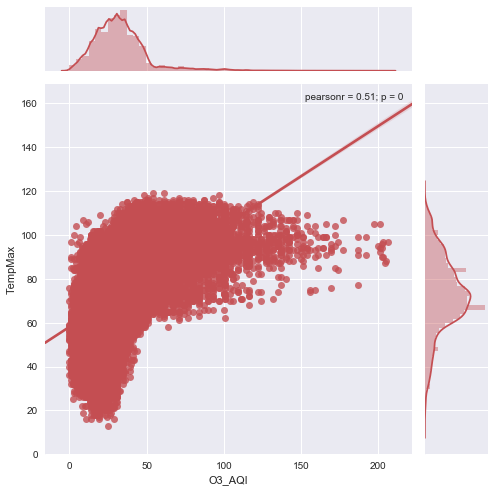

In [18]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot('O3_AQI', 'TempMax', data=pollution7, kind='reg', color='r', size=7)
plt.show()

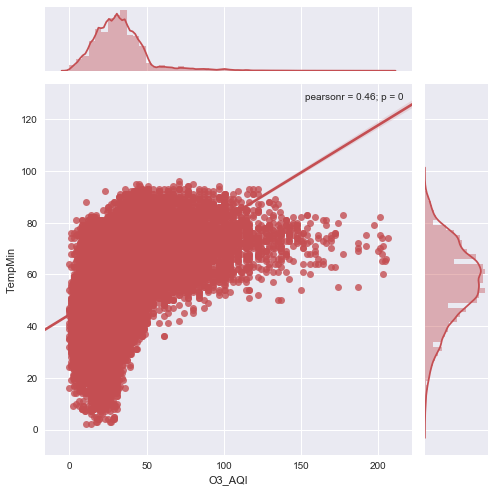

In [19]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot('O3_AQI', 'TempMin', data=pollution7,
              kind='reg', color='r', size=7)
plt.show()

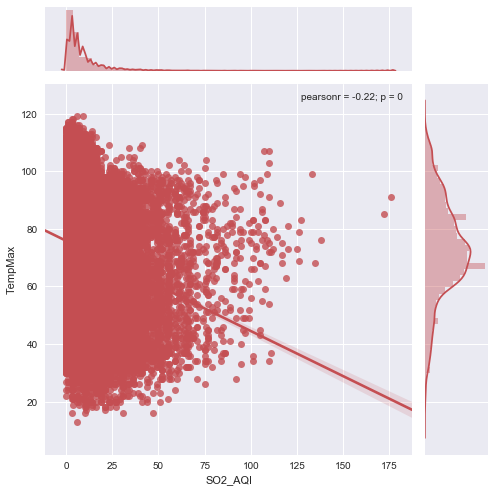

In [20]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot('SO2_AQI', 'TempMax', data=pollution7,
              kind='reg', color='r', size=7)
plt.show()

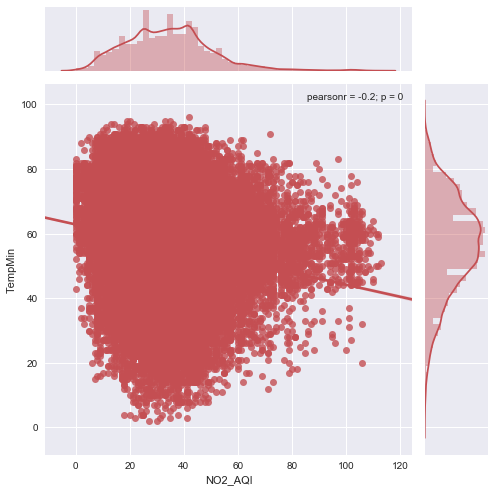

In [21]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot('NO2_AQI', 'TempMin', data=pollution7,
              kind='reg', color='r', size=7)
plt.show()

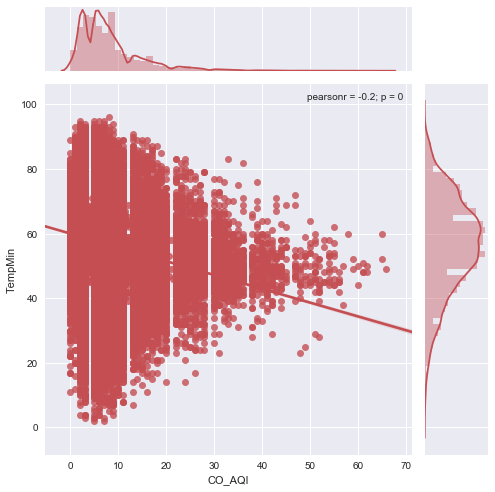

In [22]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot('CO_AQI', 'TempMin', data=pollution7,
              kind='reg', color='r', size=7)
plt.show()

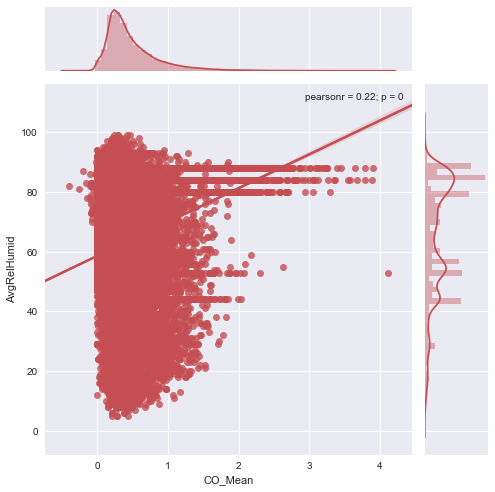

In [23]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot('CO_Mean', 'AvgRelHumid', data=pollution7,
              kind='reg', color='r', size=7)
plt.show()

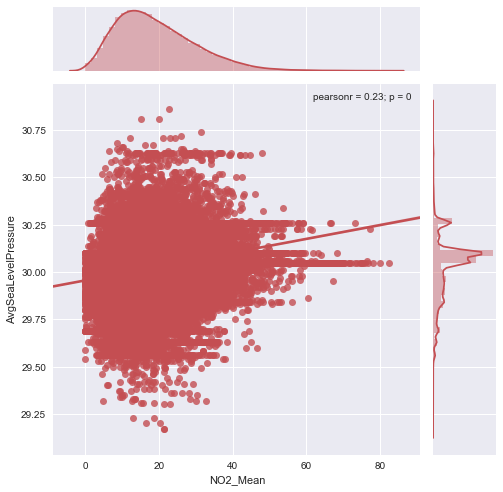

In [24]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot('NO2_Mean', 'AvgSeaLevelPressure', data=pollution7,
              kind='reg', color='r', size=7)
plt.show()

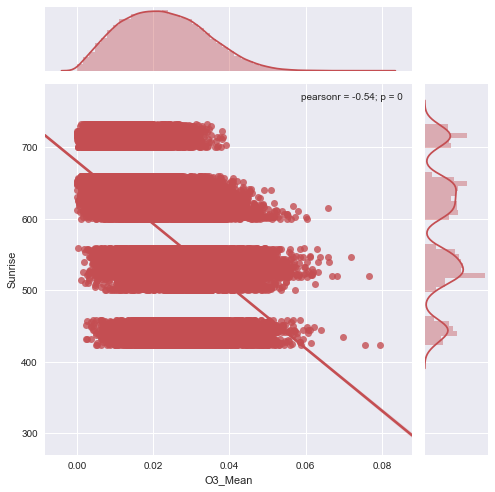

In [25]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot('O3_Mean', 'Sunrise', data=pollution7,
              kind='reg', color='r', size=7)
plt.show()

To further dissect some of these relationships, the correlation involving warmer temperatures and higher ozone levels was evaluated for Phoenix - one of the hotter cities in the US. Conversely the correlation invovling cooler temperatures and higher nitrogen dioxide levels was evaluated for Philadelphia - one of the more northern cities in the subset. The correlations prove to be even stronger for these cities.

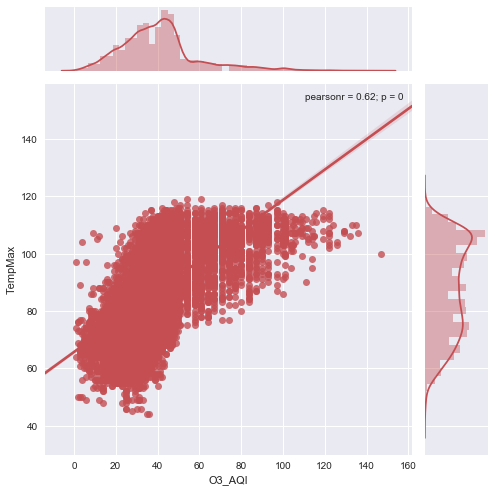

In [26]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot('O3_AQI', 'TempMax', data=pollution7[pollution7['City'] == 'Phoenix'],
              kind='reg', color='r', size=7)
plt.show()

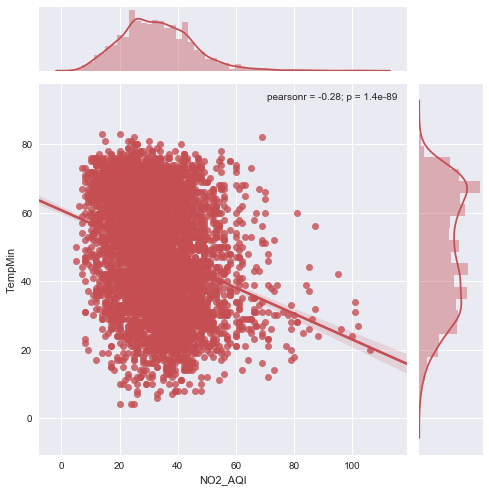

In [27]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot('NO2_AQI', 'TempMin', data = pollution7[pollution7['City'] == 'Philadelphia'],
              kind='reg', color='r', size=7)
plt.show()

This assessment of the basic statistics surrounding the dataset gives some indication that the weather data can be linked to the pollution data, possibly even providing some predictions of changes in pollutant levels.